In [2]:
import torch.nn as nn
import torch
import sklearn.model_selection.train_test_split as train_test_split

class LSTMmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.LSTM  = nn.LSTM(input_size=1, hidden_size= 50, num_layers=7, batch_first=True)
        self.linear = nn.linear(50,1)

    def forward(self,x):
        x,_ = self.LSTM(x)
        x = self.linear(x)
        return x

In [3]:
import torch.nn as nn

class lstm(nn.Module):

    def __init__(self):
        super().__init__()
        self.LSTM = nn.LSTM(input_size=1, hidden_size=50 ,num_layers=8 , batch_first=True)
        self.linear = nn.Linear(50,1)

    def forward(self,x):
        x, _ = self.LSTM(x)
        x = self.linear(x)
        return x

In [118]:
import pandas as pd

df = pd.read_csv('train.csv')
df.columns
df

df[df['keyword'].notnull()]

df = df.iloc[0:5329]
df_test = df.iloc[5329:-1]

In [119]:
list(vocabulary[-1000:-1])

['shop.',
 'shopping)',
 'shop\x89Ûªs',
 'short',
 'shot',
 'shotgun',
 'shots',
 'should',
 "should've",
 'shoulder',
 'shoulders',
 "shouldn't",
 'shout',
 'show',
 'showdown!!',
 'showed',
 'shower',
 'shows',
 'shud',
 'shut',
 'sibling',
 'side',
 'sigh',
 'sign',
 'signatures.change',
 'silence',
 'silenced',
 'silent',
 'silver',
 'silvery',
 'simple',
 'simply',
 'simulate',
 'simulating',
 'sin',
 'since',
 'since:',
 'sing-a-long',
 'singing',
 'single',
 'single-car',
 'sink.',
 'sip.',
 'sir',
 'sir.',
 'sirens',
 'sister',
 'sisters',
 'sit',
 'site',
 'sitting',
 'situation',
 'six',
 'sized',
 'skiing',
 'skills',
 'skimmed',
 'skin',
 'skip',
 'skipping',
 'skirt',
 'skull.',
 'sky',
 'sky.',
 'skyline',
 'slamming',
 'slams',
 'slapping',
 'slate',
 'slave',
 'sleep',
 'sleep!!',
 'slept',
 'slightly',
 'slip',
 'slit',
 'slithering',
 'slogan.',
 'slower',
 'small',
 'smfh',
 'smile',
 'smirking',
 'smoke',
 'smoke?',
 'smoking',
 'smooth',
 'snack',
 'snacks',
 'snap

In [120]:
n = len(df.index)
Hin = vocabulary.size
vocab_list = vocabulary.tolist()

vocabulary.shape

from torch.nn.utils.rnn import pack_sequence

words = df['text'].iloc[7].split()

for j in range(n):
    words = df['text'].iloc[j].split()
    sequence = []
    sequences = []
    for i in range(len(words)):
        index = vocab_list.index(words[i])
        x = np.zeros((Hin,1))
        x[index]=1
        sequence.append(x)
    pack_sequence(sequence)
    sequences.append(sequence)    
        
len(sequences)

TypeError: 'int' object is not callable

In [121]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame containing the tweets
# Create the vocabulary
vocabulary = np.array([])
for i in range(len(df.index)):
    words = df['text'].iloc[i].split()  
    vocabulary = np.append(vocabulary, np.unique(words))  
    vocabulary = np.unique(vocabulary)

# Create a dictionary to map each word to an index
word_to_index = {word: idx for idx, word in enumerate(vocabulary)}

# Function to one-hot encode a tweet
def one_hot_encode(tweet, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    for word in tweet.split():
        if word in word_to_index:
            index = word_to_index[word]
            one_hot_vector[index] = 1
    return one_hot_vector

# Apply the one-hot encoding to each tweet
one_hot_encoded_tweets = np.array([one_hot_encode(tweet, len(vocabulary)) for tweet in df['text']])

# Convert to DataFrame for better readability (optional)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_tweets, columns=vocabulary)
# one_hot_encoded_df = one_hot_encoded_df.assign(category=df.target.to_list())
print(one_hot_encoded_df)

        !   !!  !!!  !The    #  ##book  ##fukushima  ##youtube  #0215  #034  \
0     0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   
1     0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   
2     0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   
3     0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   
4     0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   
...   ...  ...  ...   ...  ...     ...          ...        ...    ...   ...   
5324  0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   
5325  0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   
5326  0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   
5327  0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   
5328  0.0  0.0  0.0   0.0  0.0     0.0          0.0        0.0    0.0   0.0   

      ...  å£279.00End  å£6bn  å¤}   å¨  å¬'Only   

In [122]:
n_letters = one_hot_encoded_df.shape[1]
n_letters

24501

In [ ]:
one_hot_encoded_df.to_csv("one_hot_encoded_df.csv",index=True)

one_hot_encoded_df

In [123]:
def letterToIndex(letter):
    return one_hot_encoded_df.columns.get_loc(letter)

In [124]:
one_hot_encoded_df.columns

Index(['!', '!!', '!!!', '!The', '#', '##book', '##fukushima', '##youtube',
       '#0215', '#034',
       ...
       'å£279.00End', 'å£6bn', 'å¤}', 'å¨', 'å¬'Only', 'åÇ', 'åÈ',
       'åÈMGN-AFRICAå¨', 'åÊ', 'åÊFedEx'],
      dtype='object', length=24501)

In [125]:
df.text.iloc[0].split()

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [126]:
# or an array of one-hot letter vectors

def lineToTensor(line):
    line = line.split()
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [127]:
input = lineToTensor(df.text.iloc[0])
input

tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.]]])

In [128]:

hidden = torch.zeros(1,n_letters)

# rnn(input[0],hidden)

In [129]:
Hout = 100
from torch.autograd import Variable

class RNN(nn.Module):

    def __init__(self):
        super().__init__()
        self.num_layers = 1
        self.RNNmodel = nn.RNN(input_size = Hin, hidden_size =Hout, num_layers=self.num_layers , batch_first = True, nonlinearity = 'relu' )
        self.linear = nn.Linear(in_features = Hout, out_features=Hin)
        self.softmax = nn.Softmax(dim= 0)

    def forward(self,x):
        # h0 = Variable(torch.zeros(self.num_layers, x.size(0), Hout))
        x = self.RNNmodel(x)
        x = self.linear(x)  
        x = self.softmax(x)
        return x


In [130]:
import torch.nn as nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        # all_categories.index
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden  = 128
n_letters = 31924
n_categories = 2

rnn = RNN(n_letters, n_hidden, n_categories)

In [131]:
all_categories = [1,0]

In [132]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

criterion = nn.NLLLoss()

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()



In [133]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(df[df.target==category].index)
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(df.text.iloc[line])
    return category, line, category_tensor, line_tensor

randomChoice(all_categories)

randomChoice(df[df.target==1].index)

randomTrainingExample()

(0,
 976,
 tensor([1]),
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.]]]))

In [134]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0


5000 5% (6m 49s) 0.6654 503 / 0 ✓
10000 10% (12m 54s) 0.5896 2700 / 0 ✓
15000 15% (19m 30s) 0.6480 2285 / 1 ✓
20000 20% (26m 57s) 0.7524 2484 / 1 ✗ (0)
25000 25% (33m 30s) 0.4954 4378 / 1 ✓
30000 30% (39m 49s) 0.7269 237 / 1 ✗ (0)
35000 35% (45m 39s) 1.0618 643 / 1 ✗ (0)
40000 40% (51m 22s) 0.8661 2425 / 1 ✗ (0)
45000 45% (57m 2s) 0.4274 3074 / 0 ✓
50000 50% (63m 2s) 0.1997 2308 / 0 ✓
55000 55% (68m 45s) 0.3469 3229 / 0 ✓
60000 60% (74m 28s) 0.3075 2079 / 0 ✓
65000 65% (80m 7s) 0.0081 3131 / 1 ✓
70000 70% (86m 16s) 0.0094 3773 / 0 ✓
75000 75% (93m 4s) 0.0172 4048 / 1 ✓
80000 80% (101m 2s) 0.9186 2919 / 1 ✗ (0)
85000 85% (107m 43s) 1.0865 4539 / 0 ✗ (1)
90000 90% (114m 14s) 0.4897 68 / 1 ✓
95000 95% (121m 30s) 0.4250 651 / 0 ✓
100000 100% (128m 17s) 0.2338 2563 / 1 ✓


In [139]:
torch.save(rnn, 'rnn1.pth')

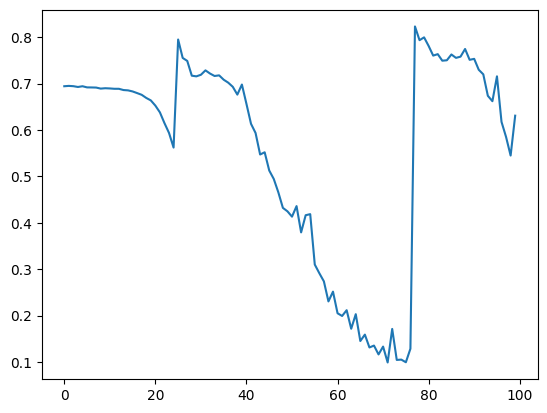

In [136]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [137]:
df.shape[0]*0.7

3730.2999999999997

In [138]:

def randomTrainingExampleTest():
    category = randomChoice(all_categories)
    line = randomChoice(df_test[df_test.target==category].index)
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(df_test.text.iloc[line])
    return category, line, category_tensor, line_tensor

randomTrainingExampleTest()

ValueError: empty range for randrange() (0, 0, 0)